## PyRCA: simulation

In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 7
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True


In [3]:
import sys
sys.path.append('../')


## Massive Experiments

In [4]:
import sys
sys.path.append('../PyRCA')


In [5]:
num_trials = 5
anomaly_types = [0, 1]
func_types = ["identity"]#"square", "sin", "tanh"]
noise_types = ["normal", "exponential", "uniform", "laplace"]
weight_generators = ["normal", "uniform"]
# _VALID_FUNC = ["identity", "square", "sin", "tanh"]
# _VALID_NOISE = ["normal", "exponential", "uniform", "laplace"]
# _VALID_WEIGHT = ["normal", "uniform"]
data_scale_params = [
    {"num_node": 50, "num_edge": 100, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 50, "num_edge": 200, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 100, "num_edge": 500, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 100, "num_edge": 750, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 500, "num_edge": 5000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 60, "num_abnormal_samples": 60},
    # {"num_node": 100, "num_edge": 500, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 100, "num_edge": 500, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 200, "num_edge": 1000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 500, "num_edge": 5000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 200, "num_edge": 1000, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 1200, "num_edge": 6000, "num_normal_samples": 160, "num_abnormal_samples": 80},
    # {"num_node": 300, "num_edge": 600, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 20, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 60, "num_abnormal_samples": 60},
    # {"num_node": 1200, "num_edge": 6000, "num_normal_samples": 60, "num_abnormal_samples": 60},
]

# dataset = generate_datasets_from_param_sets(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, num_trials)


### Feature Reduction Evaluation

In [6]:
from simulation.feature_reduction import sweep_load_and_reduction


In [239]:
fl_results = sum([
    sweep_load_and_reduction(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, [trial_no], n_jobs=-1) for trial_no in range(1, num_trials+1)
], [])


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:uniform, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: exponential, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: uniform, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_t

In [452]:
fl_ideal_results = sweep_load_and_reduction(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, list(range(1, num_trials+1)), methods=["Ideal"], n_jobs=-1)


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

In [458]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    fl_df = pd.DataFrame(fl_results).groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method"], as_index=True).mean().sort_index()
    display(fl_df)
    fl_df.reset_index().to_csv("materials/pyrca_feature_reduction_simulation_results.csv")


num_remained  \
anomaly_type num_node num_edge func_type noise_type  weight_generator num_normal_samples num_abnormal_samples reduction_method                 
0            50       100      identity  exponential normal           160                20                   BIRCH                     33.8   
                                                                                                              FluxInfer-AD              32.8   
                                                                                                              HDBS-R                     6.8   
                                                                                                              HDBS-SBD                   6.2   
                                                                                                              K-S test                  16.2   
                                                                                                              MetricSifter              16.8   
                                                                                                              NSigma                    37.0   
                                                                                                              None                      50.0   
                                                     uniform          160                20                   BIRCH                     30.2   
                                                                                                              FluxInfer-AD              27.2   
                                                                                                              HDBS-R                     7.4   
                                                                                                              HDBS-SBD                   5.0   
                                                                                                              K-S test                  11.2   
                                                                                                              MetricSifter              11.4   
                                                                                                              NSigma                    35.6   
                                                                                                              None                      50.0   
                                         laplace     normal           160                20                   BIRCH                     36.0   
                                                                                                              FluxInfer-AD              27.6   
                                                                                                              HDBS-R                     6.6   
                                                                                                              HDBS-SBD                   6.4   
                                                                                                              K-S test                  18.0   
                                                                                                              MetricSifter              15.8   
                                                                                                              NSigma                    37.2   
                                                                                                              None                      50.0   
                                                     uniform          160                20                   BIRCH                     38.8   
                                                                                                              FluxInfer-AD              32.0   
                                                                                                

In [241]:
fl_raw_df = pd.read_csv("materials/pyrca_feature_reduction_simulation_results.csv")
fl_df = fl_raw_df.groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method"], as_index=True).mean().sort_index()


In [242]:
fl_raw_df[fl_raw_df["reduction_method"] == "MetricSifter"]["bacc"].mean()


0.9655387387808569

In [12]:
import seaborn as sns

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


In [25]:

def wrap(label):
    match label.get_text():
        case "FluxInfer-AD":
            return "FluxInfer-\nAD"
        case "HDBSCAN-SBD":
            return "HDBS-SBD"
        case "HDBSCAN-PEARSON":
            return "HDBS-R"
    return label

def map_dataset(row: pd.Series):
    match row["num_node"], row["num_edge"]:
        case (50, 100):
            return '$\\mathcal{D}_{Sim}^{50\\,100}$'
        case (50, 200):
            return '$\\mathcal{D}_{Sim}^{50\\,200}$'
        case (100, 500):
            return '$\\mathcal{D}_{Sim}^{100\\,500}$'
        case (100, 750):
            return '$\\mathcal{D}_{Sim}^{100\\,750}$'
        case _:
            assert False, f"Unknown dataset {row['num_node']} {row['num_edge']}"

def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs)):
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)

from itertools import cycle

def plot_perf_of_reduction(
    df: pd.DataFrame,
    hue: str,
    evaluation_metric: str,
    legend_title: str,
    ylabel_title: str,
    num_of_hue: int,
    anomaly_types: list[int] = [0, 1, 2],
):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    box_df = df.reset_index()
    box_df = box_df[box_df["anomaly_type"].isin(anomaly_types)]
    box_df["node/edge"] = box_df["num_node"].astype(str) + "/" + box_df["num_edge"].astype(str)
    box_df["dataset"] = box_df.apply(lambda x: map_dataset(x), axis=1)

    box = sns.boxplot(
        data=box_df, x="reduction_method", y=evaluation_metric, hue=hue, showfliers=False,
        order=["NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter"],
        ax=ax,
    )

    hatchs = ["++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "***"][:num_of_hue]
    for i, (patch, hatch) in enumerate(zip(
        [p for p in box.patches if not p.get_label()],
        cycle(hatchs),
    )):
        patch.set_hatch(hatch)
        fc = patch.get_facecolor()
        patch.set_edgecolor(fc)
        patch.set_facecolor('none')
        for j in range(5*i,5*(i+1)):
            box.lines[j].set_color(fc)


    ax.set_xlabel("Reduction Method", fontsize=12)
    ax.set_ylabel(ylabel_title, fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_xticklabels([wrap(l) for l in ax.get_xticklabels()], rotation=0, fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.legend(title=legend_title)

    # https://stackoverflow.com/questions/72656861/how-to-add-hatches-to-boxplots-with-sns-boxplot-or-sns-catplot
    l = box.legend()
    for lp, hatch in zip(l.get_patches(), hatchs):
        lp.set_hatch(hatch)
        fc = lp.get_facecolor()
        lp.set_edgecolor(fc)
        lp.set_facecolor('none')

    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=num_of_hue, title=legend_title, frameon=False, fontsize=10, title_fontsize=12
    )

    fig.savefig(
        f"materials/pyrca_feature_reduction_simulation_{evaluation_metric}_by_{hue}_anomaly-{'-'.join([str(i) for i in anomaly_types])}.pdf",
        format="pdf", bbox_inches="tight",
    )


def plot_time_of_reduction(
    df: pd.DataFrame,
    hue: str,
    evaluation_metric: str,
    legend_title: str,
    ylabel_title: str,
    num_of_hue: int,
    anomaly_types: list[int] = [0, 1, 2],
):
    fig, (ax, zoomed_ax) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [1.5, 1]})
    box_df = df.reset_index()
    box_df = box_df[box_df["anomaly_type"].isin(anomaly_types)]
    box_df["node/edge"] = box_df["num_node"].astype(str) + "/" + box_df["num_edge"].astype(str)
    box_df["dataset"] = box_df.apply(lambda x: map_dataset(x), axis=1)

    bar = sns.barplot(
        data=box_df, x="reduction_method", y=evaluation_metric, hue=hue,
        order=["NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter"],
        alpha=1, color="none", fill=None,
        ax=ax,
    )

    hatchs = ["++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "***"][:num_of_hue]
    for bars, hatch, color in zip(bar.containers, cycle(hatchs), cycle(sns.color_palette()[:num_of_hue])):
        for bar in bars:
            bar.set_hatch(hatch)
            bar.set_edgecolor(color)

    ax.set_xlabel("Reduction Method", fontsize=12)
    ax.set_ylabel(ylabel_title, fontsize=12)
    ax.set_ylim(0, 6)
    ax.set_xticklabels([wrap(l) for l in ax.get_xticklabels()], rotation=0, fontsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(title=legend_title)

    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=num_of_hue, title=legend_title, frameon=False, fontsize=10, title_fontsize=12
    )

    with sns.plotting_context(context="paper", font_scale=0.8):
        max_zoomed_value = 0.4
        zoomed_df = box_df[box_df.loc[:, evaluation_metric] < max_zoomed_value]
        bar2 = sns.barplot(
            data=zoomed_df, x="reduction_method", y=evaluation_metric, hue=hue,
            order=["NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter"],
            alpha=1, color="none", fill=None,
            ax=zoomed_ax,
        )
        zoomed_ax.set_title(f"Zoomed-in View for T(s) < {max_zoomed_value}", fontsize=11)
        zoomed_ax.set_xlabel("Reduction Method", fontsize=9)
        zoomed_ax.set_ylabel(ylabel_title, fontsize=9)
        zoomed_ax.set_xticklabels([wrap(l) for l in zoomed_ax.get_xticklabels()], rotation=0, fontsize=9)
        zoomed_ax.tick_params(axis='y', labelsize=9)
        zoomed_ax.set_ylim(0, max_zoomed_value)
        zoomed_ax.get_legend().remove()

        for patch, hatch, color in zip(bar2.patches, cycle(hatchs), cycle(sns.color_palette())):
            patch.set_hatch(hatch)
            patch.set_edgecolor(color)

    fig.tight_layout()
    fig.savefig(
        f"materials/pyrca_feature_reduction_simulation_{evaluation_metric}_by_{hue}_anomaly-{'-'.join([str(i) for i in anomaly_types])}.pdf",
        format="pdf", bbox_inches="tight",
    )


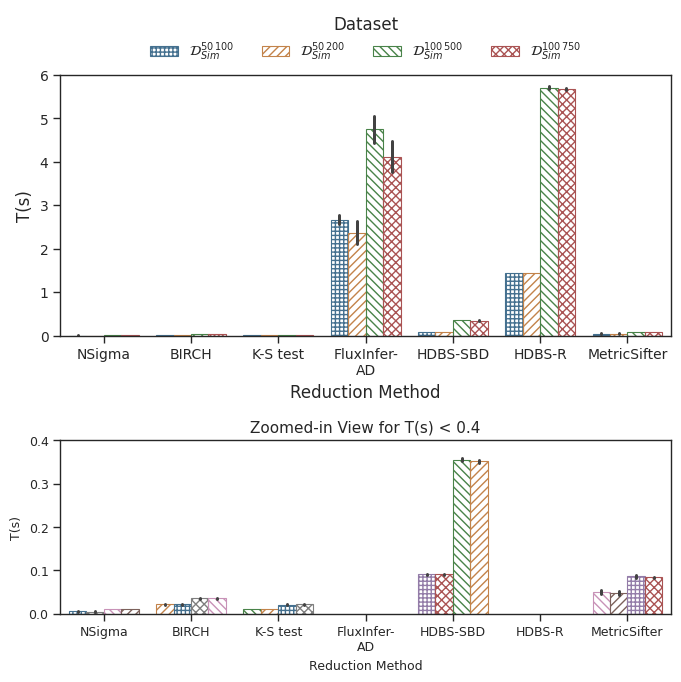

In [385]:
plot_time_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="elapsed_time_tsdr",
    legend_title="Dataset",
    ylabel_title="T(s)",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


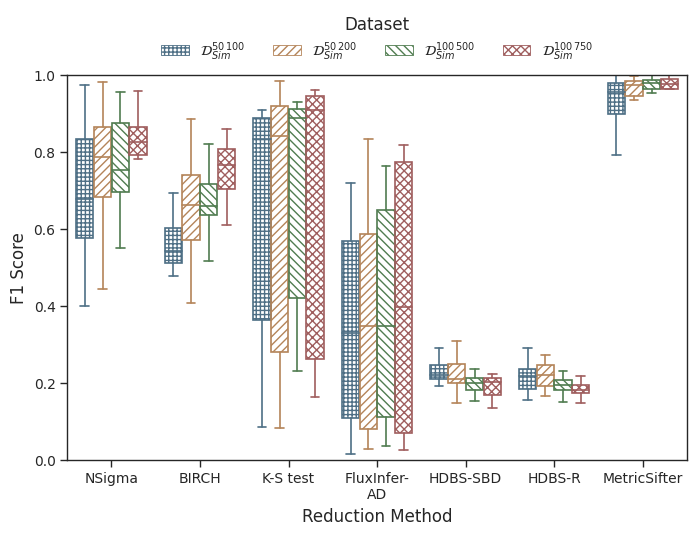

In [299]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="f1_score",
    legend_title="Dataset",
    ylabel_title="F1 Score",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


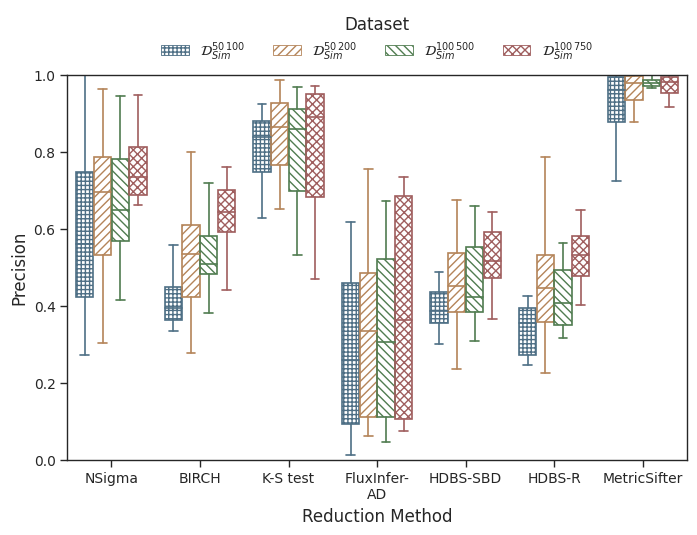

In [300]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="precision",
    legend_title="Dataset",
    ylabel_title="Precision",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


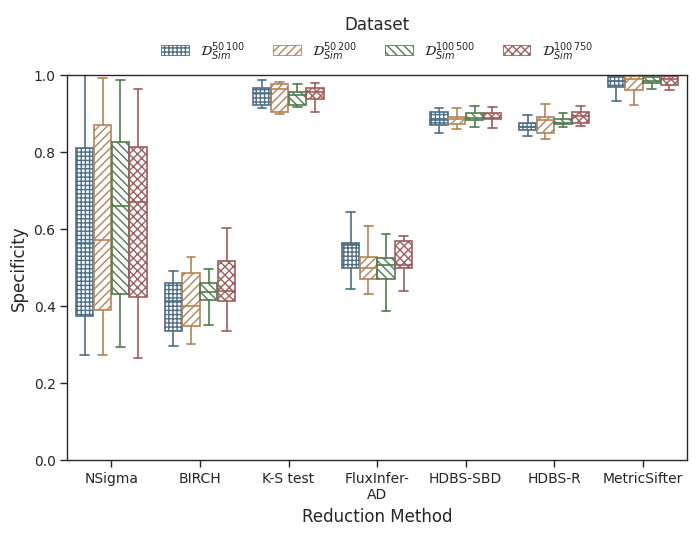

In [301]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="specificity",
    legend_title="Dataset",
    ylabel_title="Specificity",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


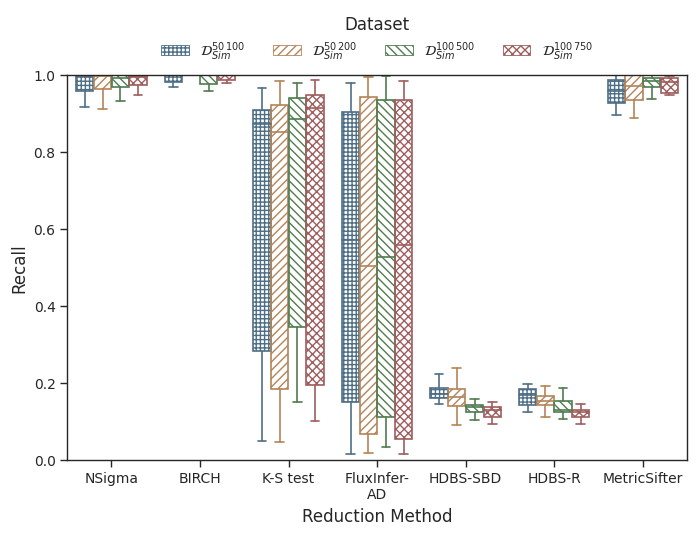

In [302]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="recall",
    legend_title="Dataset",
    ylabel_title="Recall",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


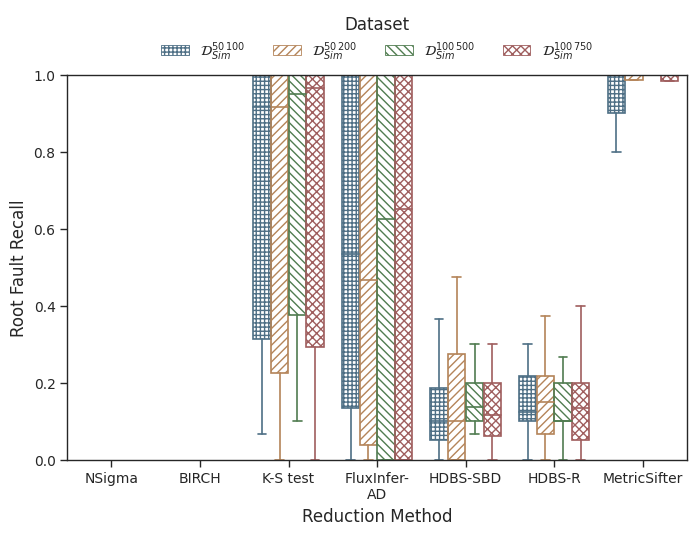

In [303]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="root_cause_recall",
    legend_title="Dataset",
    ylabel_title="Root Fault Recall",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


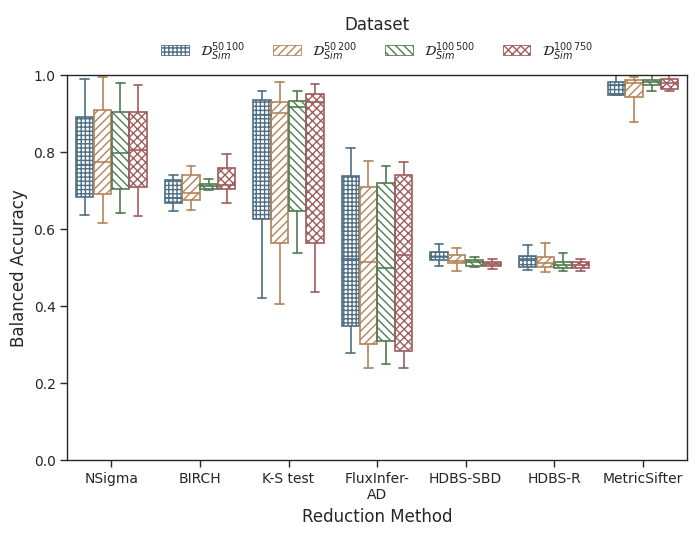

In [304]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="bacc",
    legend_title="Dataset",
    ylabel_title="Balanced Accuracy",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


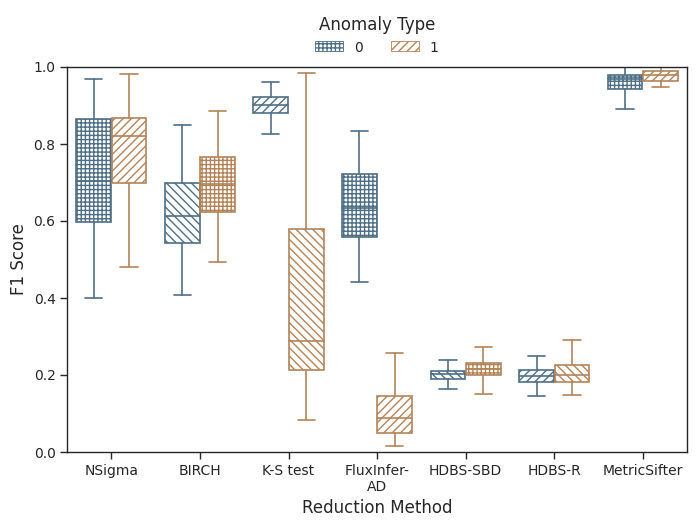

In [305]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="anomaly_type",
    evaluation_metric="f1_score",
    legend_title="Anomaly Type",
    ylabel_title="F1 Score",
    num_of_hue=3,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


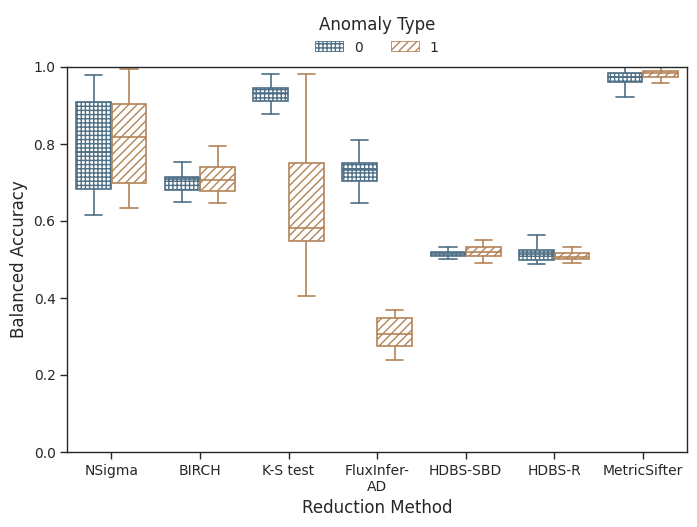

In [307]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="anomaly_type",
    evaluation_metric="bacc",
    legend_title="Anomaly Type",
    ylabel_title="Balanced Accuracy",
    num_of_hue=2,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


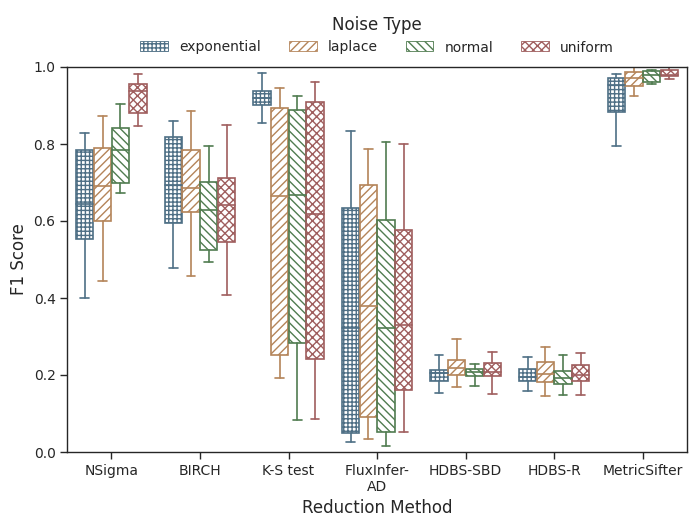

In [308]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="noise_type",
    evaluation_metric="f1_score",
    legend_title="Noise Type",
    ylabel_title="F1 Score",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


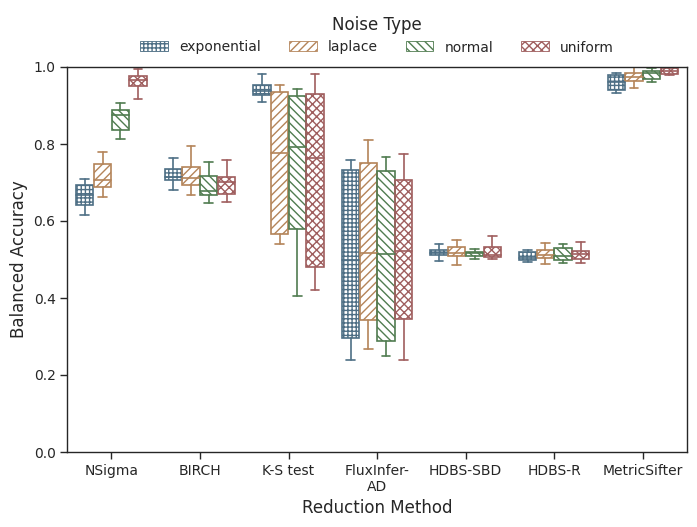

In [309]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="noise_type",
    evaluation_metric="bacc",
    legend_title="Noise Type",
    ylabel_title="Balanced Accuracy",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


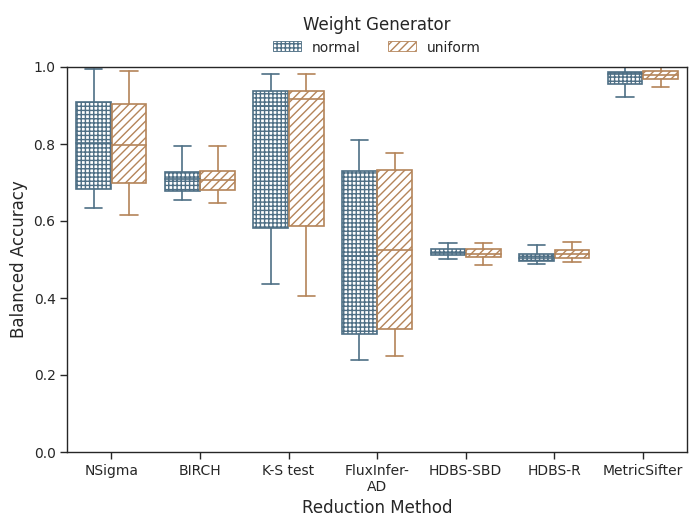

In [310]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="weight_generator",
    evaluation_metric="bacc",
    legend_title="Weight Generator",
    ylabel_title="Balanced Accuracy",
    num_of_hue=2,
)


## Params Sensitivity

In [8]:
from simulation.feature_reduction import sweep_metricsifter_params
from simulation.feature_reduction import logger

logger.setLevel("WARN")

params_sensitivity_results = sweep_metricsifter_params(
    [0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00],
    anomaly_types=anomaly_types,
    data_scale_params=data_scale_params,
    func_types=func_types,
    noise_types=noise_types,
    weight_generators=weight_generators,
    trial_nos=list(range(1, num_trials+1)),
    n_jobs=-1,
)


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 4...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 5...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 3...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

In [9]:
params_sensitivity_df = pd.DataFrame(params_sensitivity_results)
# .groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method", "metricsifter_bandwidth"], as_index=True).mean().sort_index()


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


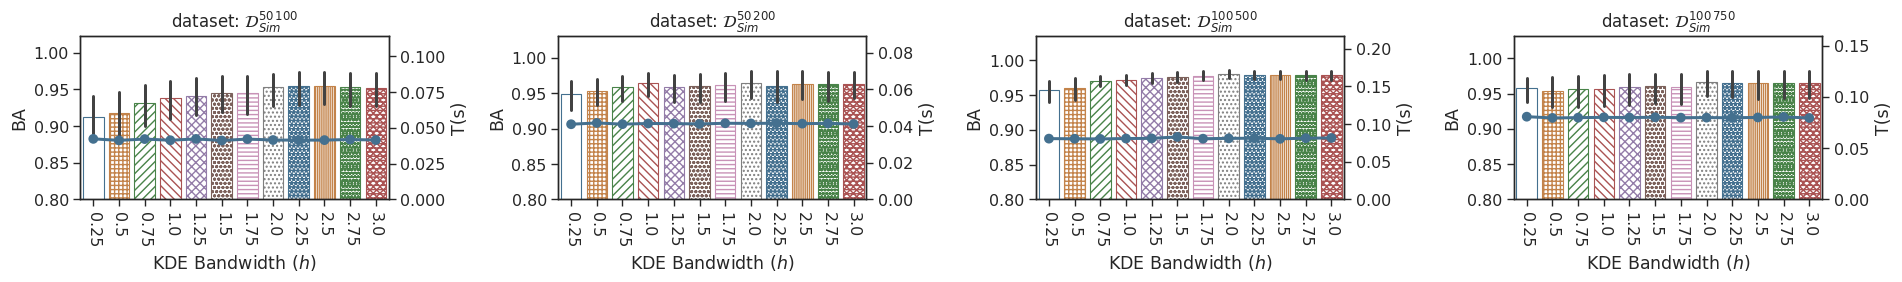

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


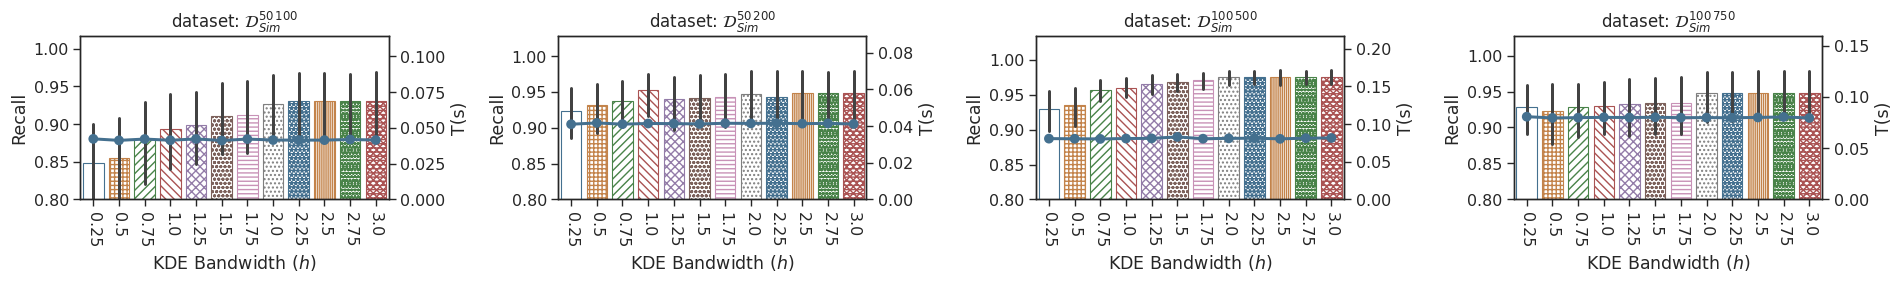

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


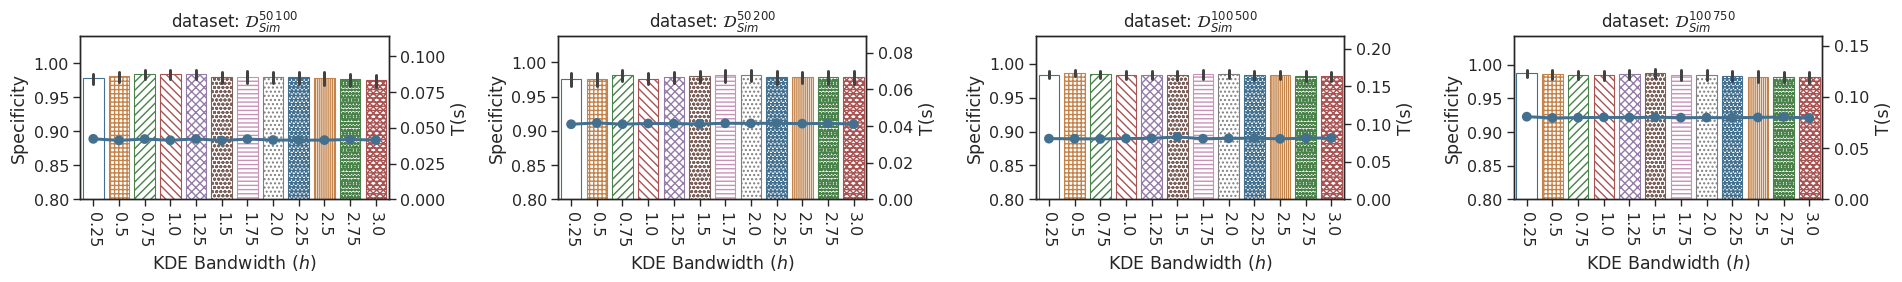

In [13]:
from itertools import cycle
import seaborn as sns

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


def metric_name(var: str):
    match var:
        case "mcc": return "MCC"
        case "bacc": return "BA"
        case "recall": return "Recall"
        case "specificity": return "Specificity"


def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs)):
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)


def facetgrid_two_axes_params(data: pd.DataFrame, x_name: str, xlabel: str, y1_name: str, y2_name: str, ylabel1: str, ylabel2: str, color: str, label: str):
    ax1 = plt.gca()
    # bar = sns.barplot(data, x=x_name, y=y1_name, alpha=.7, ax=ax1, order=order, color="none", fill=None)
    bar = sns.barplot(
        data=data, x=x_name, y=metric,# hue="combination",
        alpha=1, color="none", fill=None,
        # color="none", notch=False, showfliers=False, showcaps=True, showmeans=False,
        ax=ax1,
    )
    # https://stackoverflow.com/questions/76233164/how-to-add-hatches-to-histplot-bars-and-legend
    hatchs = ["","++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "****", "||||||||", "o-o-o-o-o", "x-x-x-x-x", "+-+-+"]
    # for container, hatch, handle, color in zip(ax.containers, hatchs, ax.get_legend().legend_handles, sns.color_palette()):
    # style_boxplot(box, hatchs)
    for patch, hatch, color in zip(bar.patches, hatchs, cycle(sns.color_palette())):
        patch.set_hatch(hatch)
        patch.set_edgecolor(color)

    ax1.grid(False)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=270)
    ax1.autoscale(enable=True, axis='y', tight=False)
    if y1_name == "bacc":
        ax1.set_ylim(ymin=0.8)
    elif y1_name == "recall":
        ax1.set_ylim(ymin=0.8)
    elif y1_name == "specificity":
        ax1.set_ylim(ymin=0.8)
    ax1.ticklabel_format(style="sci", axis="y")

    ax2 = ax1.twinx()
    markers = ["o", "s", "D", "v", "^", "P", "X", "p", "d"]
    sns.pointplot(
        data=data, x=x_name, y=y2_name,
        # order=[], hue_order=[],
        dodge=True,
        markers=markers, linestyles=["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"],
        ax=ax2,
    )

    ax2.grid(False)
    ax2.set_ylabel(ylabel2)
    ax2.set_ylabel("T(s)")
    ymax = data["elapsed_time_tsdr"].max() * 1.5
    ax2.set_ylim(ymin=0, ymax=ymax)
    ax2.ticklabel_format(style="sci", axis="y")


def plot_tsdr_perf_and_time(data_df: pd.DataFrame, metric: str):
    data_df = data_df.reset_index()
    data_df["node/edge"] = data_df["num_node"].astype(str) + "/" + data_df["num_edge"].astype(str)
    data_df["dataset"] = data_df.apply(lambda x: map_dataset(x), axis=1)
    g = sns.FacetGrid(
        data_df, col="dataset",  height=3.0, aspect=1.6,
        # col_order=col_order,
        col_wrap=4,
        margin_titles=True, despine=False,
        sharex=True, sharey=False,
    )
    g.set_titles(row_template='{row_name}', col_template='dataset: {col_name}', size=12)
    g.map_dataframe(
        facetgrid_two_axes_params,
        x_name="metricsifter_bandwidth", xlabel=r'KDE Bandwidth ($h$)',
        y1_name=metric, y2_name="elapsed_time_tsdr", ylabel1=metric_name(metric), ylabel2='T(s)', label="",
    )
    g.tight_layout()

    # ax2.get_legend().remove()
    # sns.move_legend(
    #     ax, "lower center",
    #     bbox_to_anchor=(.5, 1), ncol=3, title="Parameter Set (search, cost, penalty)", frameon=False,
    # )

    g.savefig(f"materials/plot_simulation_tsdr_params_sensitivity_{metric}.pdf", format="pdf", bbox_inches="tight")
    plt.show()


for metric in ["bacc", "recall", "specificity"]:
    plot_tsdr_perf_and_time(params_sensitivity_df, metric)


## Ablation Study

In [414]:
from simulation.feature_reduction import sweep_load_and_reduction
from simulation.feature_reduction import logger

logger.setLevel("WARN")

ablation_results = sweep_load_and_reduction(
    methods=["MetricSifter", "MetricSifter w/o segmentation"],
    data_scale_params=data_scale_params,
    anomaly_types=anomaly_types,
    func_types=func_types,
    noise_types=noise_types,
    weight_generators=weight_generators,
    trial_nos=list(range(1, num_trials+1)),
    n_jobs=-1,
)


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 4...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 3...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

In [425]:
ablation_df = pd.DataFrame(ablation_results)
ablation_df["dataset"] = ablation_df.apply(map_dataset, axis=1)
ablation_display_df = ablation_df.groupby(["dataset", "reduction_method"], as_index=True)[["bacc", "recall", "specificity", "elapsed_time_tsdr"]].mean()
ablation_display_df


bacc  \
dataset                        reduction_method                          
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                   0.979748   
                               MetricSifter w/o segmentation  0.941923   
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                   0.965151   
                               MetricSifter w/o segmentation  0.949434   
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                   0.954176   
                               MetricSifter w/o segmentation  0.928334   
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                   0.963275   
                               MetricSifter w/o segmentation  0.944450   

                                                                recall  \
dataset                        reduction_method                          
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                   0.975628   
                               MetricSifter w/o segmentation  0.981646   
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                   0.948266   
                               MetricSifter w/o segmentation  0.977205   
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                   0.930257   
                               MetricSifter w/o segmentation  0.973397   
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                   0.948154   
                               MetricSifter w/o segmentation  0.980075   

                                                              specificity  \
dataset                        reduction_method                             
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                      0.983868   
                               MetricSifter w/o segmentation     0.902200   
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                      0.982036   
                               MetricSifter w/o segmentation     0.921664   
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                      0.978096   
                               MetricSifter w/o segmentation     0.883271   
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                      0.978396   
                               MetricSifter w/o segmentation     0.908825   

                                                              elapsed_time_tsdr  
dataset                        reduction_method                                  
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                            0.084148  
                               MetricSifter w/o segmentation           0.082164  
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                            0.084487  
                               MetricSifter w/o segmentation           0.080897  
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                            0.043483  
                               MetricSifter w/o segmentation           0.041531  
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                            0.042926  
                               MetricSifter w/o segmentation           0.041492

In [432]:
print(
    ablation_display_df.style.format(precision=3).to_latex(hrules=True)
)


\begin{tabular}{llrrrr}
\toprule
 &  & bacc & recall & specificity & elapsed_time_tsdr \\
dataset & reduction_method &  &  &  &  \\
\midrule
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{100\,500}$} & MetricSifter & 0.980 & 0.976 & 0.984 & 0.084 \\
 & MetricSifter w/o segmentation & 0.942 & 0.982 & 0.902 & 0.082 \\
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{100\,750}$} & MetricSifter & 0.965 & 0.948 & 0.982 & 0.084 \\
 & MetricSifter w/o segmentation & 0.949 & 0.977 & 0.922 & 0.081 \\
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{50\,100}$} & MetricSifter & 0.954 & 0.930 & 0.978 & 0.043 \\
 & MetricSifter w/o segmentation & 0.928 & 0.973 & 0.883 & 0.042 \\
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{50\,200}$} & MetricSifter & 0.963 & 0.948 & 0.978 & 0.043 \\
 & MetricSifter w/o segmentation & 0.944 & 0.980 & 0.909 & 0.041 \\
\bottomrule
\end{tabular}



## Localization Performance Impact

In [7]:
import sys
sys.path.append('../PyRCA')


In [41]:
import pathlib

localization_dfs = []
for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}.pkl.gz", compression="gzip")
    localization_df.drop(localization_df[localization_df["localization_method"] == "RCD"].index, inplace=True)
    localization_df.drop(localization_df[localization_df["reduction_method"] == "MetricSifter"].index, inplace=True)
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_Ideal.pkl.gz", compression="gzip")
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_MetricSifter.pkl.gz", compression="gzip")
    localization_df.drop(localization_df[localization_df["localization_method"] == "RCD"].index, inplace=True)
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_rcd.pkl.gz", compression="gzip")
    localization_dfs.append(localization_df)

localization_df = pd.concat(localization_dfs)
localization_df["elapsed_time_sum"] = localization_df["elapsed_time_tsdr"] + localization_df["elapsed_time_loc"]
localization_df


trial_no   k metric      score    hit  num_root_causes  \
34           1   1    X45   0.256301  False                2   
35           1   1    X37  81.361820   True                2   
36           1   2    X25  43.147260  False                2   
37           1   3    X46  39.559394  False                2   
38           1   4    X21  36.181941  False                2   
...        ...  ..    ...        ...    ...              ...   
8905         5  56    X11   0.010000  False                1   
8906         5  57     X6   0.010000  False                1   
8907         5  58    X12   0.010000  False                1   
8908         5  59    X20   0.010000  False                1   
8909         5  60    X59   0.010000  False                1   

     localization_method  elapsed_time_loc  num_node  num_edge  ...  \
34      EpsilonDiagnosis          1.112717        50       100  ...   
35             LiNGAM+HT          2.907223        50       100  ...   
36             LiNGAM+HT          2.907223        50       100  ...   
37             LiNGAM+HT          2.907223        50       100  ...   
38             LiNGAM+HT          2.907223        50       100  ...   
...                  ...               ...       ...       ...  ...   
8905                 RCD          3.382523       100       750  ...   
8906                 RCD          3.382523       100       750  ...   
8907                 RCD          3.382523       100       750  ...   
8908                 RCD          3.382523       100       750  ...   
8909                 RCD          3.382523       100       750  ...   

      num_total  reduction_rate  root_cause_recall  recall precision  \
34           50            0.48                0.5  0.9375  0.576923   
35           50            0.48                0.5  0.9375  0.576923   
36           50            0.48                0.5  0.9375  0.576923   
37           50            0.48                0.5  0.9375  0.576923   
38           50            0.48                0.5  0.9375  0.576923   
...         ...             ...                ...     ...       ...   
8905        100            0.00                1.0  1.0000  0.610000   
8906        100            0.00                1.0  1.0000  0.610000   
8907        100            0.00                1.0  1.0000  0.610000   
8908        100            0.00                1.0  1.0000  0.610000   
8909        100            0.00                1.0  1.0000  0.610000   

     specificity  f1_score      bacc  elapsed_time_tsdr  elapsed_time_sum  
34      0.676471  0.714286  0.806985           0.005291          1.118008  
35      0.676471  0.714286  0.806985           0.005291          2.912514  
36      0.676471  0.714286  0.806985           0.005291          2.912514  
37      0.676471  0.714286  0.806985           0.005291          2.912514  
38      0.676471  0.714286  0.806985           0.005291          2.912514  
...          ...       ...       ...                ...               ...  
8905    0.000000  0.757764  0.500000           0.000007          3.382530  
8906    0.000000  0.757764  0.500000           0.000007          3.382530  
8907    0.000000  0.757764  0.500000           0.000007          3.382530  
8908    0.000000  0.757764  0.500000           0.000007          3.382530  
8909    0.000000  0.757764  0.500000           0.000007          3.382530  

[154742 rows x 28 columns]

In [42]:
def recall(X: pd.Series) -> pd.Series:
    k_values = list(range(1, X["k"].max()+1))
    acc_at_k = {k: .0 for k in k_values}
    num_anomalies: int = X["trial_no"].max()

    for k in k_values:
        for i in range(1, num_anomalies+1):
            x = X.loc[X["trial_no"] == i]
            num_root_causes = x["num_root_causes"].max()  # assume the same for all trials
            num_hit = x.loc[x["k"] <= k]["hit"].sum()
            acc_at_k[k] += num_hit / num_root_causes

        acc_at_k[k] /= num_anomalies

    return pd.Series(acc_at_k)

def avg_recall(X: pd.Series) -> pd.Series:
    max_k = X["k"].max()
    acc = recall(X)
    return pd.Series({k: acc.iloc[:k].sum() / k for k in range(1, max_k + 1)})


from eval.tsdr import get_scores_of_random_selection

def score(row: pd.Series):
    rec = recall(row)
    avgrec = avg_recall(row)
    return pd.Series(
        {
            "ac@2": rec.get(2, .0), "ac@5": rec.get(5, .0), "avg@5": avgrec.get(5, .0),
            "elapsed_time_sum": row["elapsed_time_sum"].mean(), "elapsed_time_tsdr": row["elapsed_time_tsdr"].mean(), "elapsed_time_loc": row["elapsed_time_loc"].mean(),
            "bacc": row["bacc"].mean(), "f1_score": row["f1_score"].mean(), "precision": row["precision"].mean(), "recall": row["recall"].mean(), "specificity": row["specificity"].mean(),
        }
    )

def rs_score(row: pd.Series):
    rs_score = get_scores_of_random_selection(
        num_metrics=row["num_remained"].to_numpy(), num_found_metrics=(row["num_root_causes"]*row["root_cause_recall"]).to_numpy(),
    )
    return pd.Series(
        {
            "ac@2": rs_score.get("AC_2", .0), "ac@5": rs_score.get("AC_5", .0), "avg@5": rs_score.get("AVG_5", .0),
            "elapsed_time_sum": row["elapsed_time_sum"].mean(), "elapsed_time_tsdr": row["elapsed_time_tsdr"].mean(), "elapsed_time_loc": row["elapsed_time_loc"].mean(),
            "bacc": row["bacc"].mean(), "f1_score": row["f1_score"].mean(), "precision": row["precision"].mean(), "recall": row["recall"].mean(), "specificity": row["specificity"].mean(),
        },
    )


In [43]:
from pandarallel import pandarallel
pandarallel.initialize()


INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [44]:
localization_grouped_df = localization_df.groupby(
    ["num_node", "num_edge", "anomaly_type", "func_type", "noise_type", "weight_generator", "localization_method", "reduction_method"],
    as_index=True,
).parallel_apply(score)


In [45]:
localization_grouped_df


ac@2  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method         
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.0   
                                                                                          FluxInfer-AD       0.0   
                                                                                          HDBS-SBD           0.0   
                                                                                          Ideal              0.0   
                                                                                          K-S test           0.0   
...                                                                                                          ...   
100      750      1            identity  uniform     uniform          RCD                 Ideal              0.0   
                                                                                          K-S test           NaN   
                                                                                          MetricSifter       0.2   
                                                                                          NSigma             0.0   
                                                                                          None               0.2   

                                                                                                            ac@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method         
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.0   
                                                                                          FluxInfer-AD       0.0   
                                                                                          HDBS-SBD           0.0   
                                                                                          Ideal              0.0   
                                                                                          K-S test           0.0   
...                                                                                                          ...   
100      750      1            identity  uniform     uniform          RCD                 Ideal              0.0   
                                                                                          K-S test           NaN   
                                                                                          MetricSifter       0.2   
                                                                                          NSigma             0.2   
                                                                                          None               0.2   

                                                                                                            avg@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method          
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.00   
                                                                                          FluxInfer-AD       0.00   
                                                                                          HDBS-SBD           0.00   
                                                                                          Ideal              0.00   
                                                                                          K-S test           0.00   
...                                                                                                           ...   
100      750      1            identity  uniform     uniform          RCD                 Ideal              0.00   
                                     

In [46]:
localization_rs_grouped_df = localization_df.groupby(
    ["num_node", "num_edge", "anomaly_type", "func_type", "noise_type", "weight_generator", "trial_no", "reduction_method"],
    as_index=True,
).parallel_apply(rs_score)
localization_rs_grouped_df["localization_method"] = "RS"


In [47]:
localization_rs_grouped_df


ac@2  \
num_node num_edge anomaly_type func_type noise_type  weight_generator trial_no reduction_method             
50       100      0            identity  exponential normal           1        BIRCH             0.256837   
                                                                               FluxInfer-AD      0.215510   
                                                                               HDBS-R            0.000000   
                                                                               HDBS-SBD          0.265306   
                                                                               Ideal             0.415225   
...                                                                                                   ...   
100      750      1            identity  uniform     uniform          5        Ideal             0.305556   
                                                                               K-S test          0.000000   
                                                                               MetricSifter      0.305556   
                                                                               NSigma            0.234375   
                                                                               None              0.019900   

                                                                                                     ac@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator trial_no reduction_method             
50       100      0            identity  exponential normal           1        BIRCH             0.523887   
                                                                               FluxInfer-AD      0.454910   
                                                                               HDBS-R            0.000000   
                                                                               HDBS-SBD          0.537336   
                                                                               Ideal             0.738500   
...                                                                                                   ...   
100      750      1            identity  uniform     uniform          5        Ideal             0.598122   
                                                                               K-S test          0.000000   
                                                                               MetricSifter      0.598122   
                                                                               NSigma            0.487091   
                                                                               None              0.049010   

                                                                                                    avg@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator trial_no reduction_method             
50       100      0            identity  exponential normal           1        BIRCH             0.345141   
                                                                               FluxInfer-AD      0.294890   
                                                                               HDBS-R            0.000000   
                                                                               HDBS-SBD          0.355197   
                                                                               Ideal             0.519975   
...                                                                                                   ...   
100      750      1            identity  uniform     uniform          5        Ideal             0.401878   
                                                                               K-S test          0.000000   
                                                                               MetricSifter      0.401878   
                                                                  

In [48]:
localization_joined_df = pd.concat([localization_grouped_df.reset_index(), localization_rs_grouped_df.reset_index()])


In [49]:
import matplotlib
import seaborn as sns

LOCALIZATUON_METHODS = [
    "RS",
    "EpsilonDiagnosis",
    "PC+PageRank",
    "LiNGAM+PageRank",
    # "GES+PageRank",
    "PC+HT",
    "LiNGAM+HT",
    # "GES+HT",
    "RCD",
    # "PC+RW-2",
    # "LiNGAM+RW-2",
    # "GES+RW-2",
]

REDUCTION_METHODS = [
    "None", "Ideal", "NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter",
]
# LOC_METHODS = ["RS", "e-Diagnosis", "CG+PageRank", "PC+PageRank", "LiNGAM+PageRank", "PC+HT", "LiNGAM+HT", "RCD"]

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


def wrap_loc(label):
    return "+\n".join(str(label.get_text()).split("+"))

def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs)):
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)

def facetgrid(data: pd.DataFrame, x_name: str, y1_name: str, ylabel1: str, order: list[str], color: str, label: str):
    ax1 = plt.gca()
    sns_fig = sns.boxplot(
        data, x=x_name, y=y1_name, ax=ax1, order=order,
        color="none", notch=False, showfliers=False, showcaps=True,
    )
    ax1.grid(False)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=-90)
    ax1.autoscale(enable=True, axis='y', tight=False)
    ax1.ticklabel_format(style="sci", axis="y")

    hatchs = ["///","\\\\\\","xxx", "ooo", "|||", "...", "**", "OO", "/o"]
    style_boxplot(sns_fig, hatchs)

def facetgrid_two_axes(data: pd.DataFrame, x_name: str, y1_name: str, y2_name: str, ylabel1: str, ylabel2: str, order: list[str], color: str, label: str):
    ax1 = plt.gca()
    sns_fig = sns.boxplot(
        data, x=x_name, y=y1_name, ax=ax1, order=order,
        color="none", notch=False, showfliers=False, showcaps=True,
    )
    ax1.grid(False)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=-90)
    ax1.autoscale(enable=True, axis='y', tight=False)
    ax1.ticklabel_format(style="sci", axis="y", scilimits=(-2,2))

    hatchs = ["///","\\\\\\","xxx", "ooo", "|||", "...", "**", "OO", "/o"]
    style_boxplot(sns_fig, hatchs)
    # for _bar, hatch in zip(sns_fig.patches, hatchs):
    #     _bar.set_hatch(hatch)
    #     _bar.set_edgecolor(color)

    if data["localization_method"].apply(lambda x: x == "RS").all():
        return

    ax2 = ax1.twinx()
    sns.pointplot(data, x=x_name, y=y2_name, ax=ax2, order=order)
    ax2.grid(False)
    ax2.set_ylabel(ylabel2)
    ax2.autoscale(enable=True, axis='y', tight=False)
    ax2.ticklabel_format(style="sci", axis="y")


def plot_grid(data: pd.DataFrame):
    data["node/edge"] = data["num_node"].astype(str) + "/" + data["num_edge"].astype(str)
    data["dataset"] = data.apply(lambda x: map_dataset(x), axis=1)

    row_order = LOCALIZATUON_METHODS
    col_order = data["dataset"].unique().tolist()
    map_x = "reduction_method"
    map_x_order = REDUCTION_METHODS

    data.loc[data["localization_method"] == "EpsilonDiagnosis", "localization_method"] = r"$\epsilon$-Diagnosis"
    row_order[row_order.index("EpsilonDiagnosis")] = r"$\epsilon$-Diagnosis"

    g = sns.FacetGrid(
        data, col="dataset", row="localization_method", height=2.4, aspect=1.8, col_order=col_order, margin_titles=True, despine=False, row_order=row_order,
        sharex=True, sharey=False,
    )
    g.set_titles(row_template='{row_name}', col_template='{col_var}: {col_name}', size=12)
    g.map_dataframe(
        facetgrid_two_axes, x_name=map_x, y1_name="avg@5", y2_name="elapsed_time_sum", ylabel1='AVG@5', ylabel2="T(s)", order=map_x_order, label="",
        # facetgrid, x_name=map_x, y1_name="avg@5", ylabel1='AVG@5', order=map_x_order, label="",
    )
    g.set_axis_labels(x_var='Reduction Method')
    for ax in g.axes.flat:
        for text in ax.texts:
            if isinstance(text, matplotlib.text.Annotation):
                # adjust the position of the row text
                text.set_x(text.get_position()[0] + 0.25)

    # skip empty plots
    # https://stackoverflow.com/questions/40186545/how-to-avoid-empty-grids-in-seaborn-facetgrid
    for (i,j,k), data in g.facet_data():
        if data.empty:
            ax = g.facet_axis(i, j)
            ax.set_axis_off()

    g.figure.subplots_adjust(wspace=0, hspace=0)
    g.tight_layout()
    g.savefig(f"materials/simulation_reduction_and_localization_grid_dataset_and_localization.pdf", format="pdf", bbox_inches="tight")


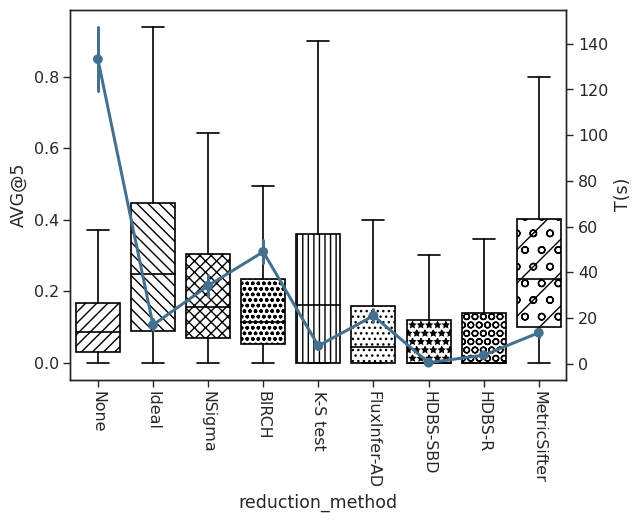

In [50]:
facetgrid_two_axes(data=localization_joined_df.fillna(0).reset_index(), x_name="reduction_method", y1_name="avg@5", y2_name="elapsed_time_sum", ylabel1='AVG@5', ylabel2="T(s)", order=REDUCTION_METHODS, color="", label="")


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


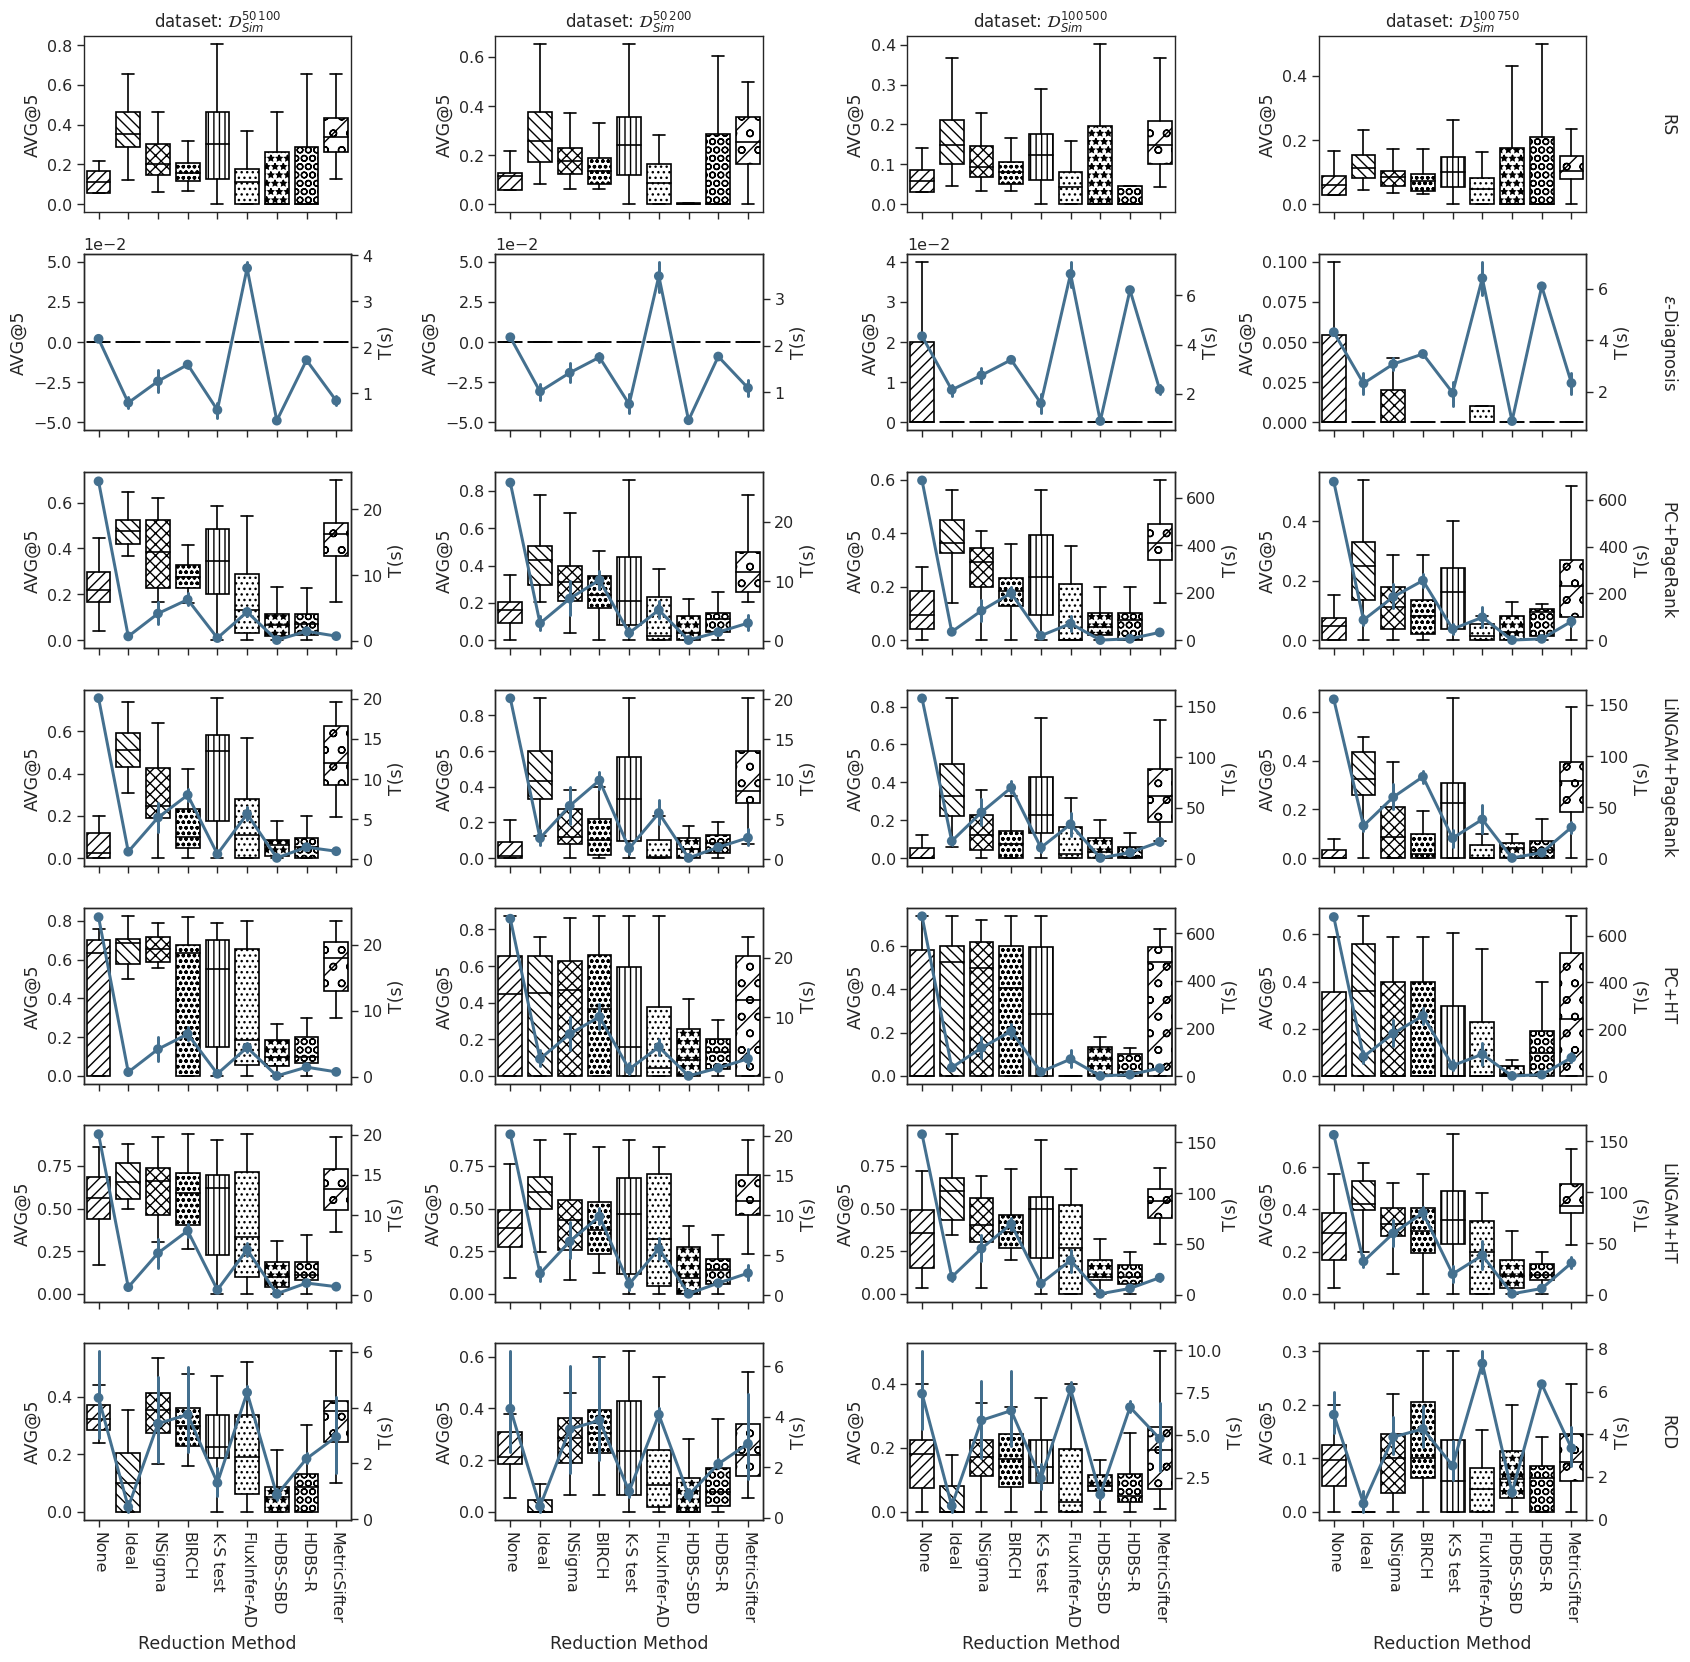

In [51]:
plot_grid(localization_joined_df.fillna(0).reset_index())


## Correlation Analysis

In [53]:
from itertools import product

loc_scores = ["ac@2", "ac@5", "avg@5"]
tsdr_all_scores = ["bacc", "recall", "specificity"]

def correlation_fn(group: pd.Series, tsdr_scores: list[str] = ["bacc"], loc_score: str = "avg@5", method="pearson"):
    # display(group[loc_scores], group[tsdr_scores])
    # print("print", group[tsdr_scores], group[loc_scores[-1]])
    z = group[tsdr_scores].corrwith(group[loc_score], method=method, axis=0)
    return z

def correlation_pval_fn(group: pd.Series, tsdr_scores: list[str] = ["bacc"], loc_score: str = "avg@5"):
    res = {}
    for tsdr_score, loc_score in product(tsdr_scores, loc_scores):
        r = scipy.stats.pearsonr(group[tsdr_score], group[loc_score], alternative="greater")
        res[tsdr_score] = r.pvalue
    return pd.Series(res)


corr_localization_df = localization_joined_df[localization_joined_df["reduction_method"] != "Ideal"].fillna(0).reset_index()  # remove ideal
corr_localization_df["node/edge"] = corr_localization_df["num_node"].astype(str) + "/" + corr_localization_df["num_edge"].astype(str)
corr_localization_df["dataset"] = corr_localization_df.apply(lambda x: map_dataset(x), axis=1)
corr_localization_df.loc[corr_localization_df["localization_method"] == "EpsilonDiagnosis", "localization_method"] = r"$\epsilon$-Diagnosis"

for loc_score in loc_scores[2:3]:
    for method in ["pearson", "spearman", "kendall"][0:1]:
        display(
            (loc_score, method),
            corr_localization_df[tsdr_all_scores].corrwith(corr_localization_df[loc_score], method=method, axis=0),
            corr_localization_df.groupby(['dataset'], as_index=True).apply(
                correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            ).dropna(),
            corr_localization_df.groupby(['localization_method'], as_index=True).apply(
                correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            ).dropna(),
            corr_localization_df.groupby(['reduction_method'], as_index=True).apply(
                correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            ).dropna(),
            corr_localization_df.groupby(['dataset', 'localization_method'], as_index=True).apply(
                correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            ).dropna(),
        )


('avg@5', 'pearson')

bacc           0.402319
recall         0.327593
specificity    0.100939
dtype: float64

bacc    recall  specificity
dataset                                                        
$\mathcal{D}_{Sim}^{100\,500}$  0.403435  0.319298     0.112639
$\mathcal{D}_{Sim}^{100\,750}$  0.329825  0.231778     0.127639
$\mathcal{D}_{Sim}^{50\,100}$   0.493191  0.426399     0.094015
$\mathcal{D}_{Sim}^{50\,200}$   0.434531  0.349205     0.116002

bacc    recall  specificity
localization_method                                  
$\epsilon$-Diagnosis -0.006652  0.175926    -0.212145
LiNGAM+HT             0.622097  0.687269    -0.065292
LiNGAM+PageRank       0.681919  0.374593     0.381617
PC+HT                 0.357099  0.434267    -0.083584
PC+PageRank           0.607025  0.485382     0.157923
RCD                   0.341334  0.470091    -0.144437
RS                    0.445171  0.252572     0.244082

bacc    recall  specificity
reduction_method                                 
BIRCH             0.023460 -0.086866     0.043183
FluxInfer-AD      0.492142  0.486271     0.137261
HDBS-R            0.211938  0.198378     0.092887
HDBS-SBD          0.176091  0.133847     0.099438
K-S test          0.352871  0.341579     0.092739
MetricSifter      0.106877  0.086502     0.114649
NSigma            0.179108 -0.104427     0.197245

bacc    recall  \
dataset                        localization_method                        
$\mathcal{D}_{Sim}^{100\,500}$ $\epsilon$-Diagnosis -0.007323  0.204671   
                               LiNGAM+HT             0.678421  0.705222   
                               LiNGAM+PageRank       0.686685  0.386094   
                               PC+HT                 0.412991  0.462787   
                               PC+PageRank           0.732605  0.542547   
                               RCD                   0.325894  0.339854   
                               RS                    0.449804  0.242754   
$\mathcal{D}_{Sim}^{100\,750}$ $\epsilon$-Diagnosis  0.028501  0.257715   
                               LiNGAM+HT             0.674983  0.647194   
                               LiNGAM+PageRank       0.661490  0.321494   
                               PC+HT                 0.297776  0.287122   
                               PC+PageRank           0.468609  0.261518   
                               RCD                   0.150752  0.251453   
                               RS                    0.323167  0.145572   
$\mathcal{D}_{Sim}^{50\,100}$  $\epsilon$-Diagnosis -0.068985  0.140944   
                               LiNGAM+HT             0.644418  0.834526   
                               LiNGAM+PageRank       0.802927  0.471170   
                               PC+HT                 0.473153  0.598608   
                               PC+PageRank           0.703630  0.674099   
                               RCD                   0.481048  0.763015   
                               RS                    0.604073  0.349530   
$\mathcal{D}_{Sim}^{50\,200}$  $\epsilon$-Diagnosis -0.054566  0.098709   
                               LiNGAM+HT             0.616441  0.655275   
                               LiNGAM+PageRank       0.666305  0.351137   
                               PC+HT                 0.309694  0.425775   
                               PC+PageRank           0.670112  0.519358   
                               RCD                   0.490126  0.605295   
                               RS                    0.494067  0.293719   

                                                     specificity  
dataset                        localization_method                
$\mathcal{D}_{Sim}^{100\,500}$ $\epsilon$-Diagnosis    -0.253041  
                               LiNGAM+HT               -0.021413  
                               LiNGAM+PageRank          0.378218  
                               PC+HT                   -0.049650  
                               PC+PageRank              0.244107  
                               RCD                     -0.011452  
                               RS                       0.266988  
$\mathcal{D}_{Sim}^{100\,750}$ $\epsilon$-Diagnosis    -0.276602  
                               LiNGAM+HT                0.040362  
                               LiNGAM+PageRank          0.426294  
                               PC+HT                    0.016227  
                               PC+PageRank              0.260239  
                               RCD                     -0.119258  
                               RS                       0.226584  
$\mathcal{D}_{Sim}^{50\,100}$  $\epsilon$-Diagnosis    -0.243918  
                               LiNGAM+HT               -0.196658  
                               LiNGAM+PageRank          0.406339  
                               PC+HT                   -0.126741  
                               PC+PageRank              0.056883  
                               RCD                     -0.307643  
                               RS                       0.313435  
$\mathcal{D}_{Sim}^{50\,200}$  $\epsilon$-Diagnosis    -0.173918  
                               LiNGAM+HT               -0.031304  
                               LiNGAM+PageRank          0.389076  
                               PC+HT                   -0.129274

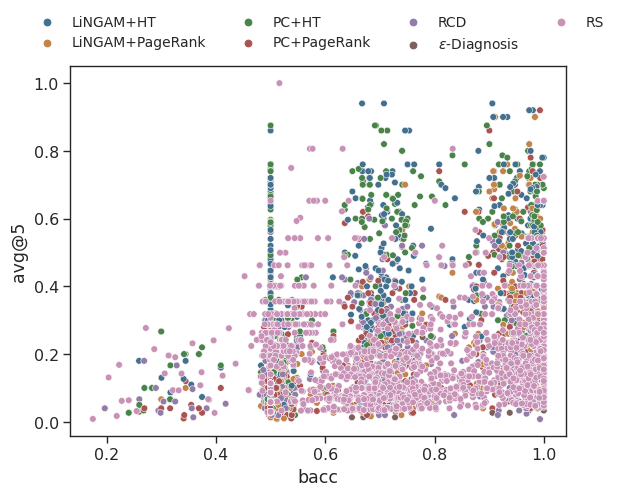

In [72]:
g = sns.scatterplot(data=corr_localization_df.loc[corr_localization_df["avg@5"] > 0.0].groupby(["num_node", "num_"]).mean(), x="bacc", y="avg@5", hue="localization_method")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title="", frameon=False, fontsize=10, title_fontsize=12
)
# g.move_legend("lower center", bbox_to_anchor=(.5, 1), ncol=3, title="Localization Method", frameon=False)


In [62]:
tex = corr_localization_df.groupby(['localization_method'], as_index=True).apply(
    correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
).dropna().style.format(precision=3).to_latex(hrules=True)
print(tex)
# ["RS", r"$\epsilon$-Diagnosis", "PC+PageRank", "PC+HT", "LiNGAM+PageRank", "LiNGAM+HT"]


\begin{tabular}{lrrr}
\toprule
 & bacc & recall & specificity \\
localization_method &  &  &  \\
\midrule
$\epsilon$-Diagnosis & -0.007 & 0.176 & -0.212 \\
LiNGAM+HT & 0.622 & 0.687 & -0.065 \\
LiNGAM+PageRank & 0.682 & 0.375 & 0.382 \\
PC+HT & 0.357 & 0.434 & -0.084 \\
PC+PageRank & 0.607 & 0.485 & 0.158 \\
RCD & 0.341 & 0.470 & -0.144 \\
RS & 0.445 & 0.253 & 0.244 \\
\bottomrule
\end{tabular}



## Testing

In [ ]:
# Investigate why MetricSifter is slow
from simulation.synthetic_data import load_data

normal_data_df, abnormal_data_df, true_root_causes, adjacency_df, anomaly_propagated_nodes = load_data(
    anomaly_type=1,
    data_params=dict(
        num_node=100,
        num_edge=750,
        num_normal_samples=160,
        num_abnormal_samples=20,
    ),
    func_type="identity",
    noise_type="normal",
    weight_generator="uniform",
    trial_no=2,
)


In [ ]:
from tsdr.multireducer import change_point_clustering_with_kde

concated_data_df = pd.concat([normal_data_df, abnormal_data_df], axis=0, ignore_index=True)
cinfo, remove_metrics = change_point_clustering_with_kde(
    concated_data_df,
    search_method="pelt",
    cost_model="l2",
    penalty="bic",
    n_bkps=1,
    kde_bandwidth=1.0,
    kde_bandwidth_adjust=1.0,
    multi_change_points=True,
    representative_method=False,
    segment_selection_method="weighted_max",
    n_jobs=1,
)


In [ ]:
len(remove_metrics)


90